### Write a program to implement the Logistic regression for a sample training data set stored as a .CSV file. Compute the accuracy of the model, considering few test data sets. ###

In [37]:
import pandas as pd
dataset = pd.read_csv(r'Dataset/Social_Network_Ads.csv')

In [38]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [39]:
x = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state = 0)

In [41]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

In [42]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train, y_train)

LogisticRegression()

In [43]:
y_pred = reg.predict(x_test)

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [45]:
cm

array([[75,  4],
       [ 9, 32]], dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)

In [47]:
acc

0.8916666666666667

In [48]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)

In [49]:
cr

'              precision    recall  f1-score   support\n\n           0       0.89      0.95      0.92        79\n           1       0.89      0.78      0.83        41\n\n    accuracy                           0.89       120\n   macro avg       0.89      0.86      0.88       120\nweighted avg       0.89      0.89      0.89       120\n'

In [55]:
from sklearn.metrics import roc_curve
fprl,tprl,thresh1 = roc_curve(y_test,y_pred,pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [56]:
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test,y_pred)

In [57]:
auc_score1

0.8649274467428218

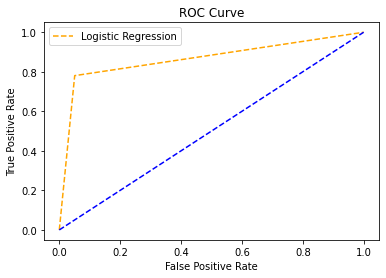

In [60]:
import matplotlib.pyplot as plt
plt.plot(fprl, tprl, linestyle='--', color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

In [68]:
import numpy as np
from matplotlib.colors import ListedColormap

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


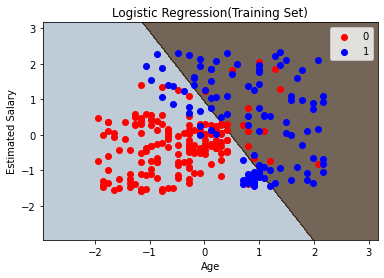

In [69]:
x_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                     np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01))
plt.contourf(X1,X2, reg.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap = ListedColormap(('#AABBCC','#443322')))
plt.xlim((X1.min(),X1.max()))
plt.ylim((X2.min(),X2.max()))
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(('red','blue'))(i),label=j)
plt.title('Logistic Regression(Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


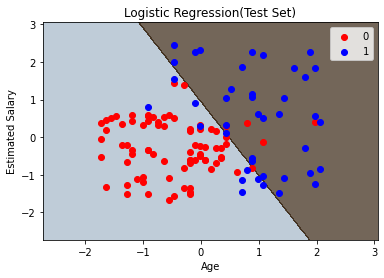

In [70]:
x_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                     np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01))
plt.contourf(X1,X2, reg.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap = ListedColormap(('#AABBCC','#443322')))
plt.xlim((X1.min(),X1.max()))
plt.ylim((X2.min(),X2.max()))
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(('red','blue'))(i),label=j)
plt.title('Logistic Regression(Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()